In [3]:
from IPython.display import Image

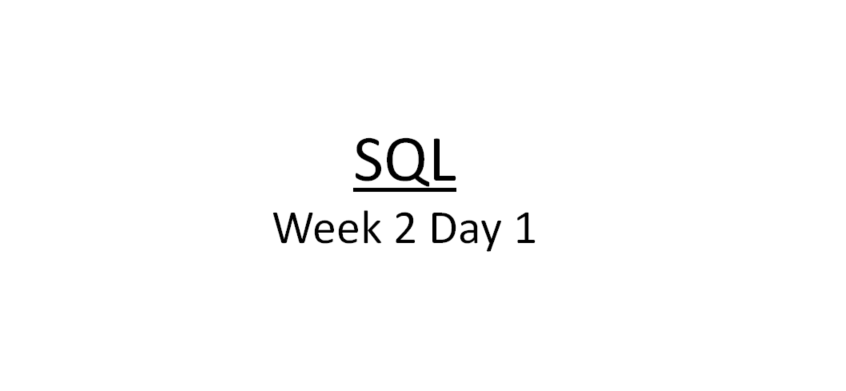

In [4]:
Image(filename='1.PNG')

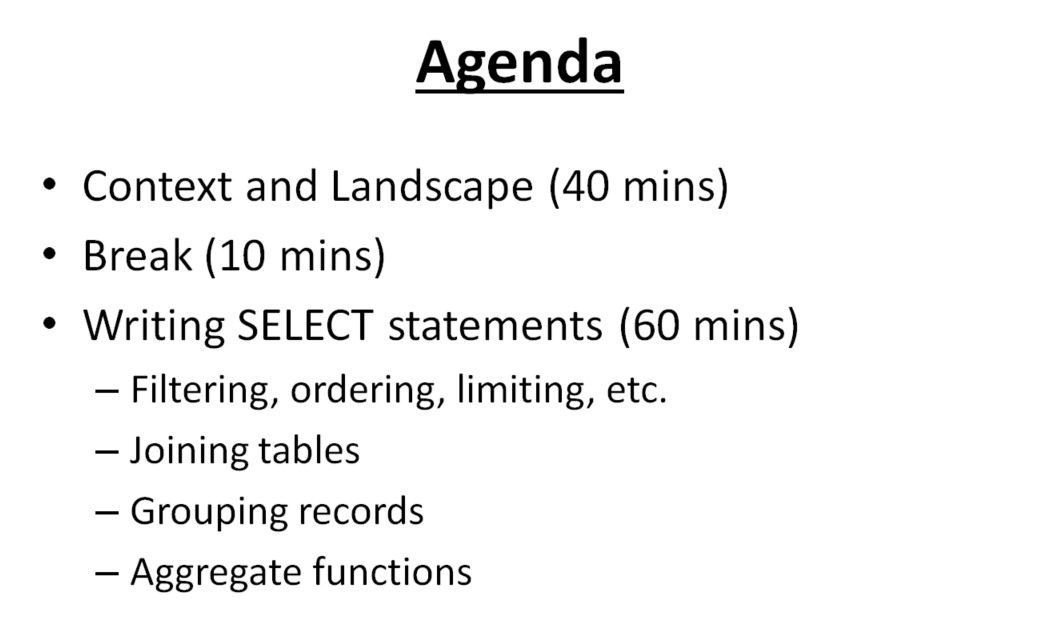

In [5]:
Image(filename='2.PNG')

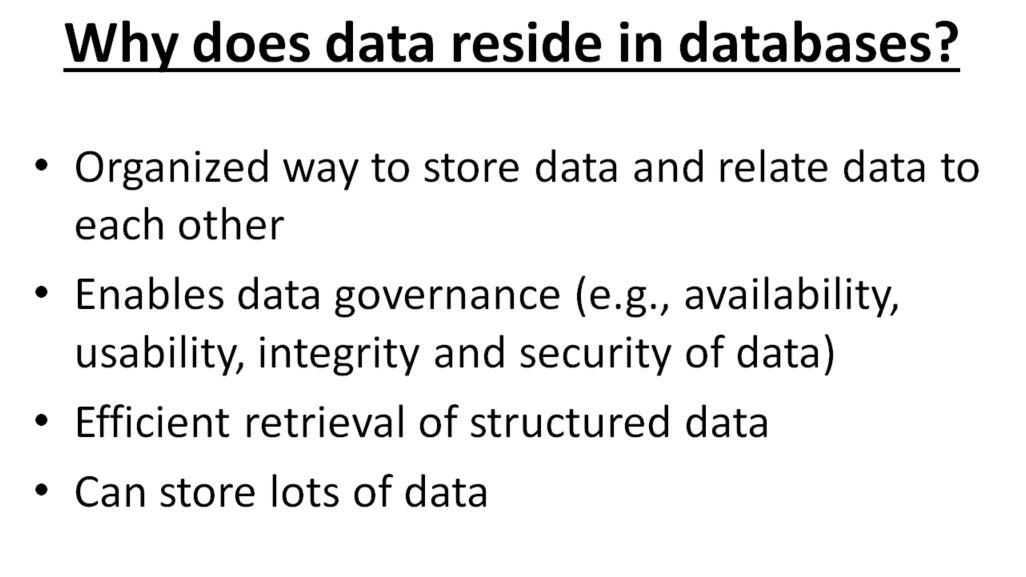

In [6]:
Image(filename='3.PNG')

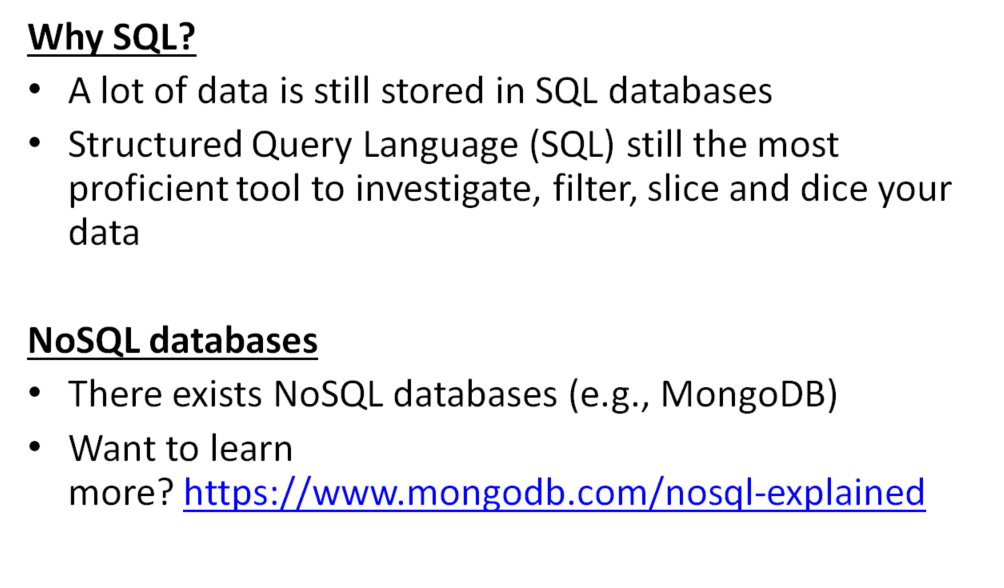

In [7]:
Image(filename='4.PNG')

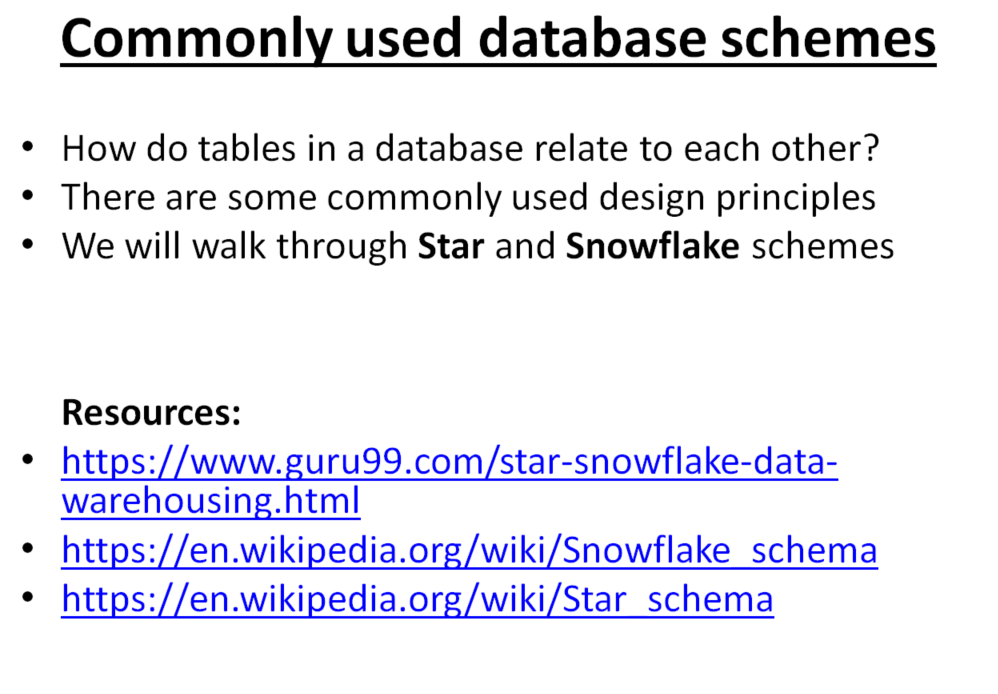

In [8]:
Image(filename='5.PNG')

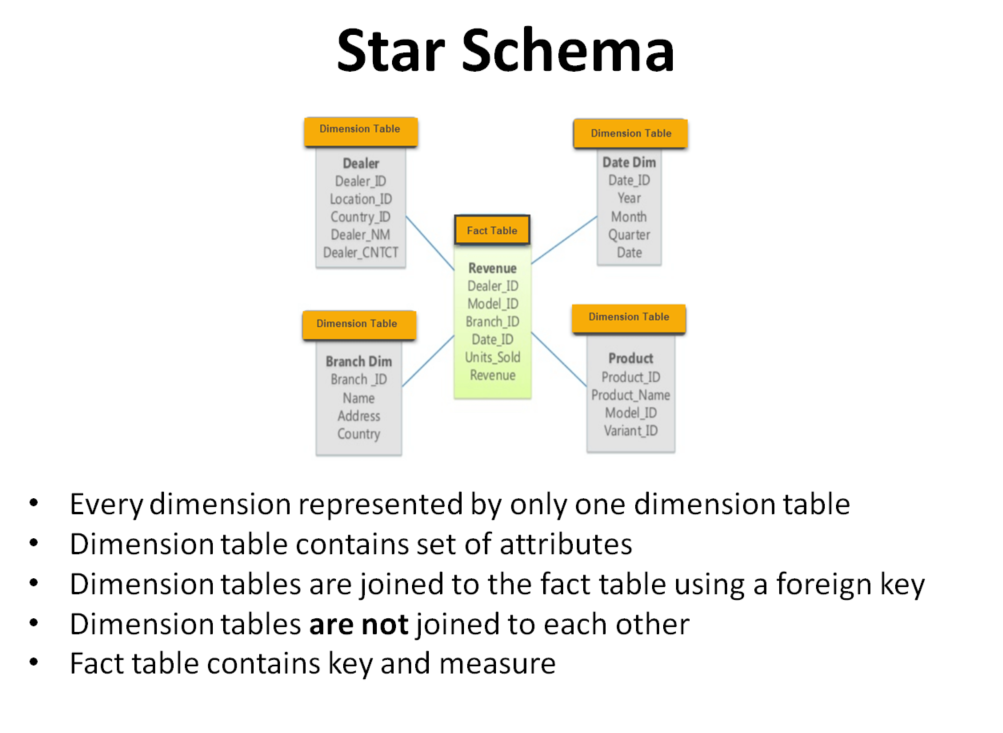

In [9]:
Image(filename='6.PNG')

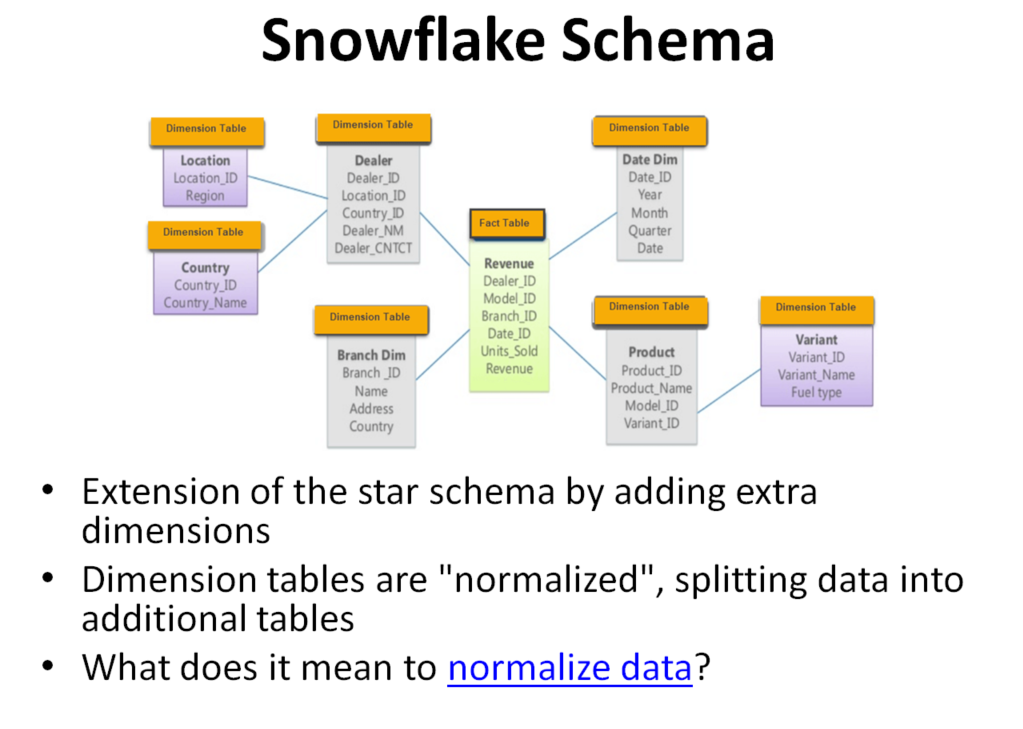

In [10]:
Image(filename='7.PNG')

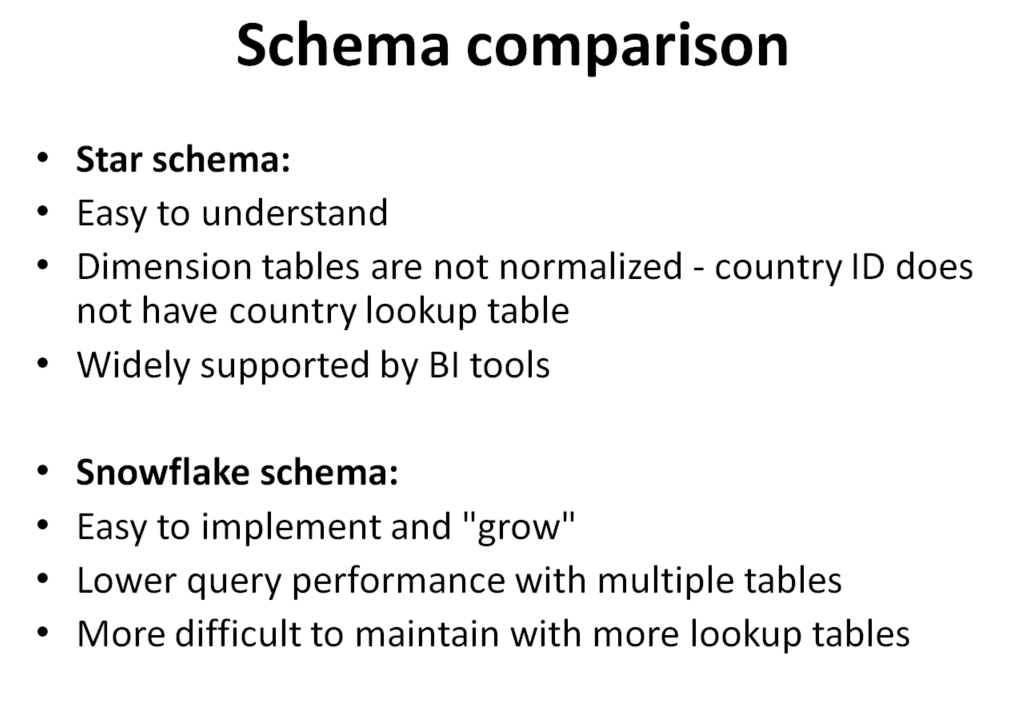

In [11]:
Image(filename='8.PNG')

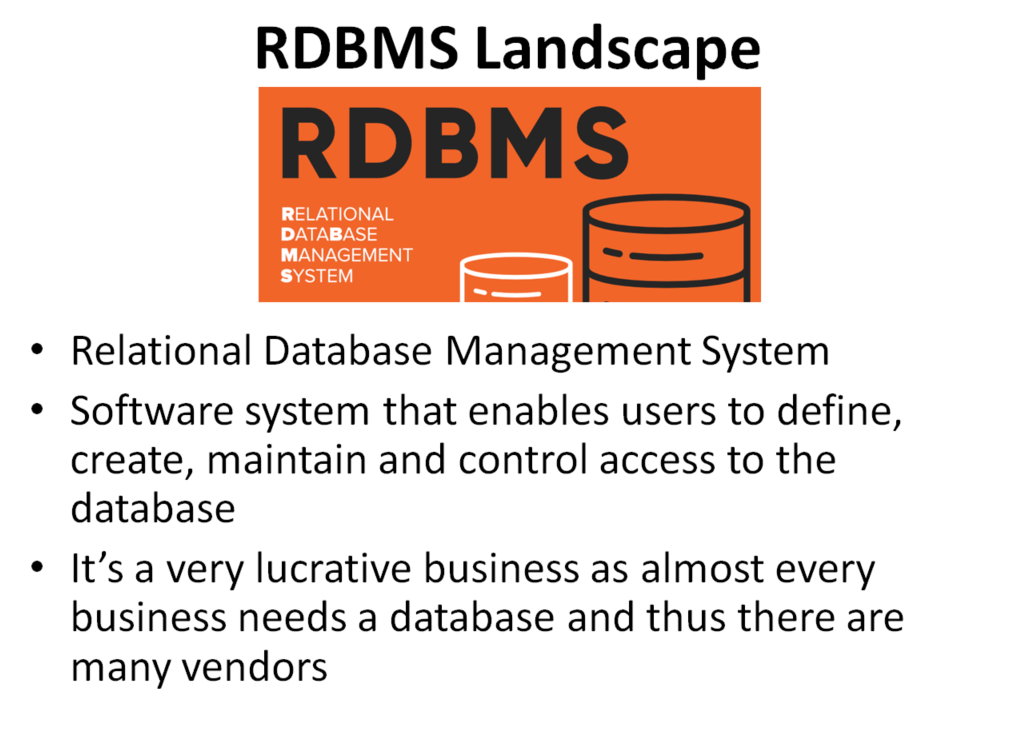

In [12]:
Image(filename='9.PNG')

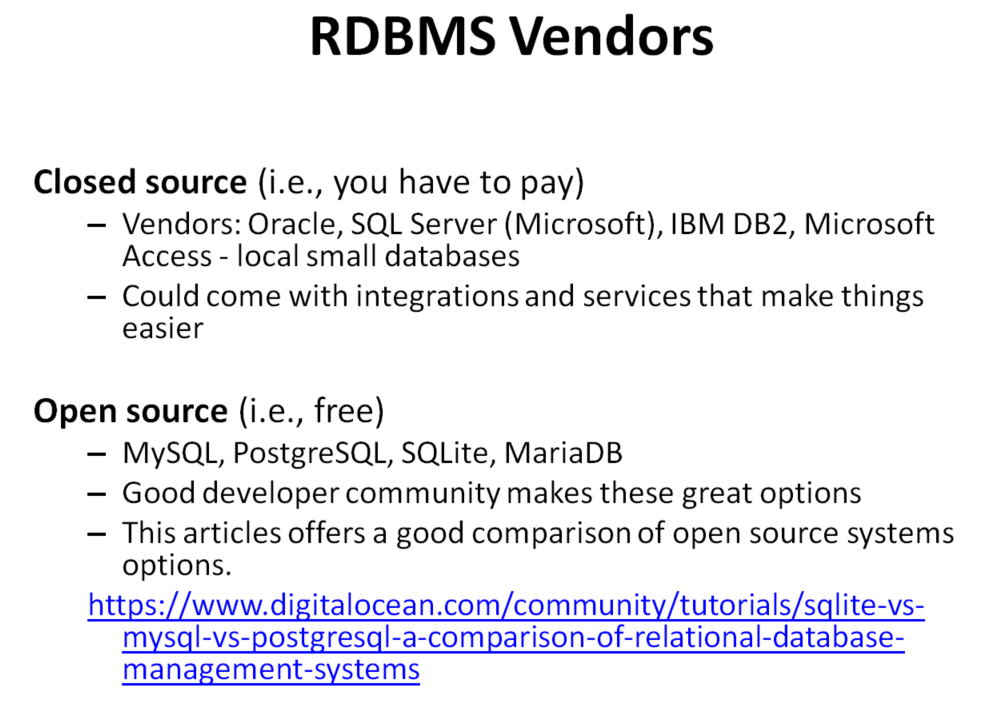

In [13]:
Image(filename='10.PNG')

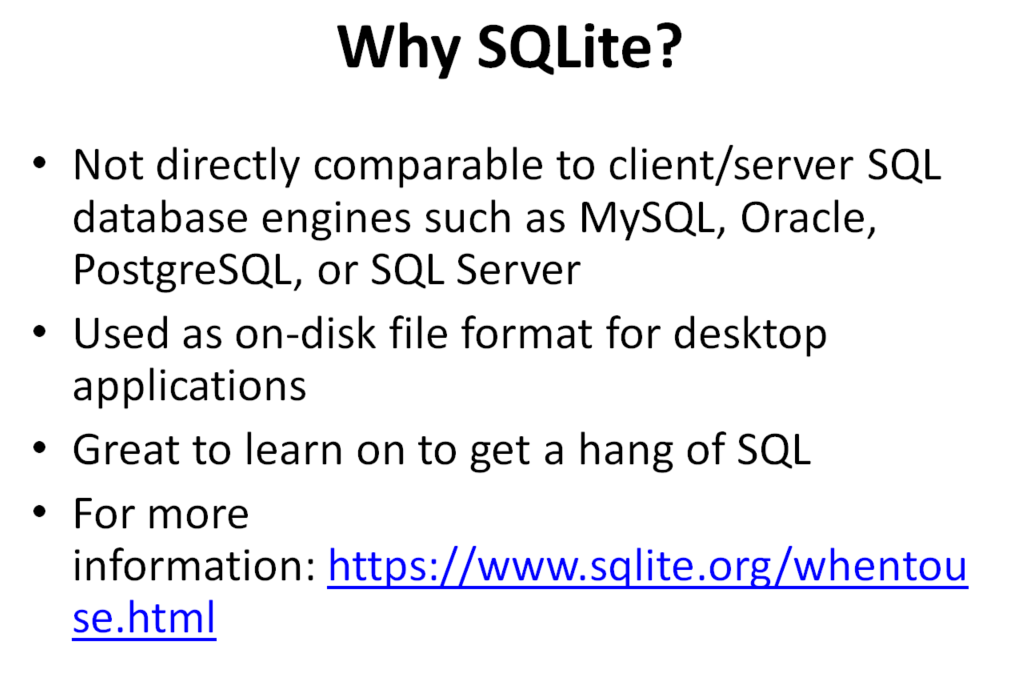

In [14]:
Image(filename='11.PNG')

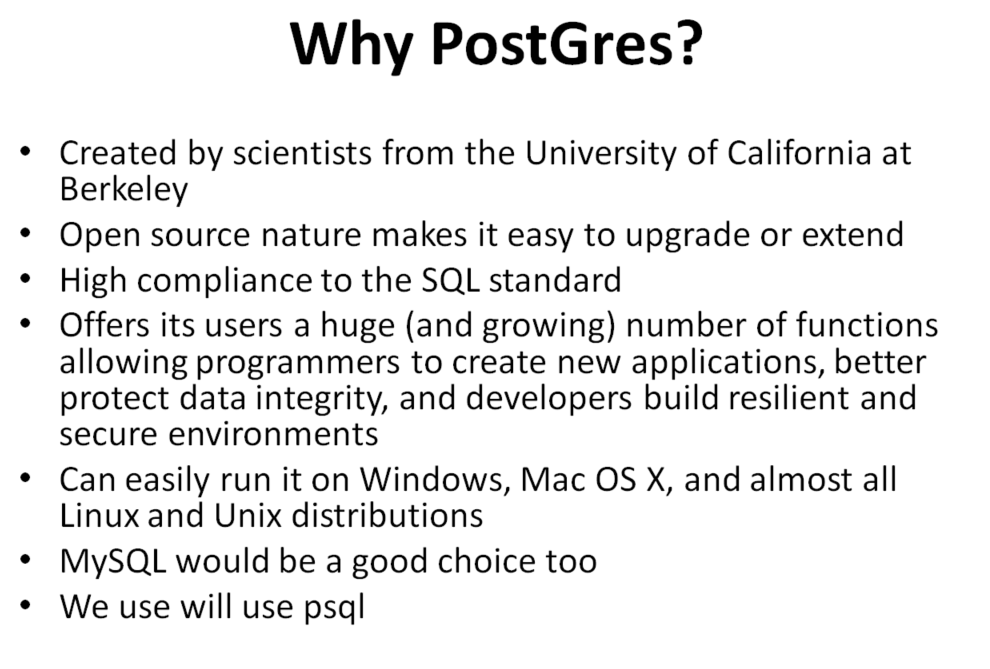

In [15]:
Image(filename='12.PNG')

## Make sure everyone is set up before break...

1. Install PostGreSQL: https://www.datacamp.com/community/tutorials/installing-postgresql-windows-macosx
* From your terminal: `pip install psycopg2`
* Open a jupyter notebook and run `import psycopg2`to make sure it works 

To get a database going: 
1. Open pgsql shell
* Log in (should be all "enter" if you left it at default)
* Set a password (REMEMBER THIS!)
* `\l` to see what databases already exist
* `CREATE DATABASE drinks;`
* `\l` to see that it was created

To write to a database:

(You will need the `drinks.sql` file in the same directory as this notebook)

In [16]:
import os
import psycopg2

postgres_pwd = 'postgresql' # This is the password you entered when you set up PGSQL

con = psycopg2.connect(database='drinks', user='postgres', password=postgres_pwd,
                       host='127.0.0.1', port='5432')  # This should work if you left everything as default

cur = con.cursor()

cur.execute(open('drinks.sql', 'r').read())

OperationalError: could not connect to server: Connection refused (0x0000274D/10061)
	Is the server running on host "127.0.0.1" and accepting
	TCP/IP connections on port 5432?


# Break

- Take 10 minutes, come back at ...


## Demo
* Show you how to query data from a database
* Statements that start with `SELECT`

## Intro to the sample database we're using - Drinks

Database schema:

* has_on_menu(<em><ins>bar</ins></em>: string, <em><ins>drink_id</ins></em>: string, <em><ins>price</ins></em>: real)


* orders(<em><ins>person</ins></em>: string, <em><ins>date</ins></em>: string, bar, <em><ins>drink_id</ins></em>: string, quantity: integer)


* drink_info(<em><ins>drink_id</ins></em>: string, <em><ins>type</ins></em>: string)

The `drink_info` relation specifies for each `drink_id` what type of drink it is, e.g., beer, wine, etc.

## Setting up the connection to our database

In [7]:
# make necessary imports and set up environmental variables
import os
import psycopg2
import pandas as pd
postgres_pwd = 'postgresql'

In [8]:
# connect to the database
con = psycopg2.connect(database='drinks', user='postgres', password=postgres_pwd,
                       host='127.0.0.1', port='5432')

query = con.cursor()

## Executing our first query

Get the first 5 rows from orders

In [9]:
# execute a simple query
query.execute(
"""
SELECT *
FROM orders
LIMIT 5;
""")

response = query.fetchall()

for row in response:
    print(row)

('person 1', '2016-10-16', 'bar 9', 'drink 4', 1)
('person 1', '2016-10-16', 'bar 9', 'drink 44', 1)
('person 1', '2016-10-22', 'bar 19', 'drink 1', 4)
('person 1', '2016-10-22', 'bar 19', 'drink 9', 1)
('person 1', '2016-10-22', 'bar 19', 'drink 42', 2)


An easier way to see the data...

In [10]:
pd.DataFrame(response)

,0,1,2,3,4
0,person 1,2016-10-16,bar 9,drink 4,1
1,person 1,2016-10-16,bar 9,drink 44,1
2,person 1,2016-10-22,bar 19,drink 1,4
3,person 1,2016-10-22,bar 19,drink 9,1
4,person 1,2016-10-22,bar 19,drink 42,2


## Quick recap for SQL

The basic format is
<img src='select-statement.png' width=200>

What would the following tell us with our database?
```
SELECT *
FROM orders
WHERE bar='bar 9'
```

---
Reminder - our database:

<img src='our-db.png' width=400 align='left'>

## Other commands

Use a cheat sheet!
<img src='sql-cheat-sheet.png' width=700>

## More on joins

- `(INNER) JOIN`: Returns records that have matching values in both tables
- `LEFT (OUTER) JOIN`: Returns all records from the left table, and the matched records from the right table
- `RIGHT (OUTER) JOIN`: Returns all records from the right table, and the matched records from the left table
- `FULL (OUTER) JOIN`: Returns all records when there is a match in either left or right table

<img src='joins.png'>

## Let's work through some problems

### Question 1:
Get the bar name and average price of each bar

What do you think? What table do we need? What calculation do we need?

---
Reminder - our database:

<img src='our-db.png' width=400 align='left'>

In [11]:
# Carly
query.execute(
"""
SELECT bar, AVG(price) 
FROM has_on_menu 
GROUP BY has_on_menu.bar
""")

response = query.fetchall()
pd.DataFrame(response)

,0,1
0,bar 14,93.438857
1,bar 8,67.919044
2,bar 16,121.364365
3,bar 15,90.993793
4,bar 12,152.071032
5,bar 6,27.682568
6,bar 17,107.329703
7,bar 9,52.381706
8,bar 7,61.567487
9,bar 18,105.214779


In [12]:
query.execute(
"""
SELECT bar, AVG(price) AS avg_price
FROM has_on_menu
GROUP BY bar
""")

response = query.fetchall()

pd.DataFrame(response)

,0,1
0,bar 14,93.438857
1,bar 8,67.919044
2,bar 16,121.364365
3,bar 15,90.993793
4,bar 12,152.071032
5,bar 6,27.682568
6,bar 17,107.329703
7,bar 9,52.381706
8,bar 7,61.567487
9,bar 18,105.214779


In [13]:
print(response)

[('bar 14', 93.4388573646545), ('bar 8', 67.9190438270569), ('bar 16', 121.364365041256), ('bar 15', 90.9937927246094), ('bar 12', 152.071031570435), ('bar 6', 27.6825675964355), ('bar 17', 107.329703092575), ('bar 9', 52.3817055225372), ('bar 7', 61.5674865245819), ('bar 18', 105.214778661728), ('bar 11', 31.5625584920247), ('bar 19', 18.2244342168172), ('bar 3', 129.809512887682), ('bar 5', 100.603857914607), ('bar 20', 86.5131576855977), ('bar 10', 60.5726349694388), ('bar 1', 83.6785185677665), ('bar 13', 150.560439014435), ('bar 4', 49.2509773373604), ('bar 2', 60.2587044715881)]


In [14]:
colnames = [desc[0] for desc in query.description]
print(colnames)

['bar', 'avg_price']


### Question 2:
Get the bars with the top 5 average prices.

What do you think? How can we adapt the code we did before?

---
Reminder - our database:

<img src='our-db.png' width=400 align='left'>

In [15]:
query.execute(
"""
SELECT bar, AVG(price) AS avg_price
FROM has_on_menu
GROUP BY bar
ORDER BY avg_price DESC
LIMIT 5
""")

response = query.fetchall()

pd.DataFrame(response)

,0,1
0,bar 12,152.071032
1,bar 13,150.560439
2,bar 3,129.809513
3,bar 16,121.364365
4,bar 17,107.329703


In [16]:
colnames = [desc[0] for desc in query.description]
print(colnames)

['bar', 'avg_price']


### Question 3:
Which bar sells the cheapest drink? Which drink and what's the price?

---
Reminder - our database:

<img src='our-db.png' width=400 align='left'>

In [17]:
query.execute(
"""
SELECT bar, drink_id, price
FROM has_on_menu
ORDER BY price ASC
LIMIT 1;
""")

response = query.fetchall()

pd.DataFrame(response)

,0,1,2
0,bar 18,drink 43,3.47789


### Question 4:
What is the number of beers sold by each bar?

(If you interpret it to be "sold" as in available for sale, then you need `has_on_menu`; if you interpret "sold" as in a sale was made, then you need `orders`)

Hint: you need two tables here

---
Reminder - our database:

<img src='our-db.png' width=400 align='left'>

In [18]:
query.execute(
"""
SELECT orders.bar, SUM(orders.quantity) as beers_sold from orders
JOIN drink_info ON drink_info.drink_id = orders.drink_id
WHERE drink_info.type = 'beer'
GROUP BY orders.bar
ORDER BY beers_sold DESC
"""
)

response = query.fetchall()

pd.DataFrame(response)

,0,1
0,bar 20,176
1,bar 5,111
2,bar 3,108
3,bar 11,80
4,bar 2,79
5,bar 10,66
6,bar 17,36


In [19]:
query.execute(
"""
SELECT o.bar, SUM(o.quantity) total_beer
    FROM orders o, drink_info d
    WHERE o.drink_id = d.drink_id 
        AND d.type = 'beer'
    GROUP BY bar
    ORDER BY total_beer;
""")

response = query.fetchall()

pd.DataFrame(response)

,0,1
0,bar 17,36
1,bar 10,66
2,bar 2,79
3,bar 11,80
4,bar 3,108
5,bar 5,111
6,bar 20,176


### Challenge question

For each person, find the bar they visit, and the type(s) and price(s) of the drink(s) they drink during those visits.

---
Reminder - our database:

<img src='our-db.png' width=400 align='left'>

In [20]:
query.execute(
"""
SELECT o.person, o.bar, d.type, h.price
    FROM orders o
    JOIN has_on_menu h ON (o.drink_id = h.drink_id AND o.bar = h.bar) 
    JOIN drink_info d ON o.drink_id = d.drink_id;
""")

response = query.fetchall()

pd.DataFrame(response)

,0,1,2,3
0,person 1,bar 9,cocktail,26.48720
1,person 1,bar 9,vodka,99.06150
2,person 1,bar 19,cocktail,11.77570
3,person 1,bar 19,rum,18.19580
4,person 1,bar 19,whisky,34.50720
5,person 1,bar 18,soda,3.47789
6,person 1,bar 14,wine,304.05400
7,person 1,bar 14,wine,6.28381
8,person 2,bar 19,rum,18.19580
9,person 2,bar 19,whisky,34.50720


### Making sure we close off the connection

In [ ]:
query.close()